In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
from statistics import mode
toy_data = [3, 8, 1, 3, 6,  21, -4]
mymean = np.mean(toy_data)
mymedian = np.median(toy_data)
mymode = mode(toy_data)
myrange = np.max(toy_data)-np.min(toy_data)
mystd=  np.std(toy_data)
myvar = np.var(toy_data)

print('The mean is = %.2f' %mymean, '\nThe median is =',mymedian, '\nThe mode is =',mymode, 
     '\nThe range is =',myrange, '\nThe standard deviation is = %.2f'%mystd,
     '\nThe variance is = %.2f'%myvar)

The mean is = 5.43 
The median is = 3.0 
The mode is = 3 
The range is = 25 
The standard deviation is = 7.27 
The variance is = 52.82


In [3]:
mycov = np.cov([1, 2, 3], [1.0, 2.5, 7.5])
mycov

array([[ 1.        ,  3.25      ],
       [ 3.25      , 11.58333333]])

In [4]:
mycorr = np.corrcoef([1, 2, 3], [1.0, 2.5, 7.5])
mycorr

array([[1.        , 0.95491911],
       [0.95491911, 1.        ]])

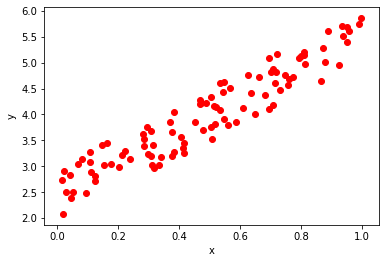

In [3]:
# Linear regression 
x = np.random.rand(100, 1)   # generate random data of 100 samples
y = 2 + 3 * x + np.random.rand(100, 1)   # randomly generated samples are offset by 2 and multiplied by 3

plt.scatter(x,y, color = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Slope: [[-3.02420112]]
Intercept: [5.47587413]
Root mean squared error:  0.3077024929256509


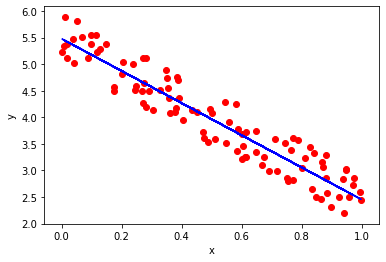

([<matplotlib.lines.Line2D at 0x1fbb552d708>], None)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Linear regression 
x = np.random.rand(100, 1)   # generate random data of 100 samples
y = - 3 * x + 5 + np.random.rand(100, 1)   # randomly generated samples are offset and multiplied

# Linear Regression Model initialization
regress_model = LinearRegression()
# Fit the data(train the model)
regress_model.fit(x, y)
# Predict
y_predicted = regress_model.predict(x)

# model evaluation
rmse = np.sqrt(mean_squared_error(y, y_predicted))

# printing values
print('Slope:' ,regress_model.coef_)
print('Intercept:', regress_model.intercept_)
print('Root mean squared error: ', rmse)


# plotting values

# data points
plt.scatter(x, y, color='r'), plt.xlabel('x'), plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='b'), plt.show()

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


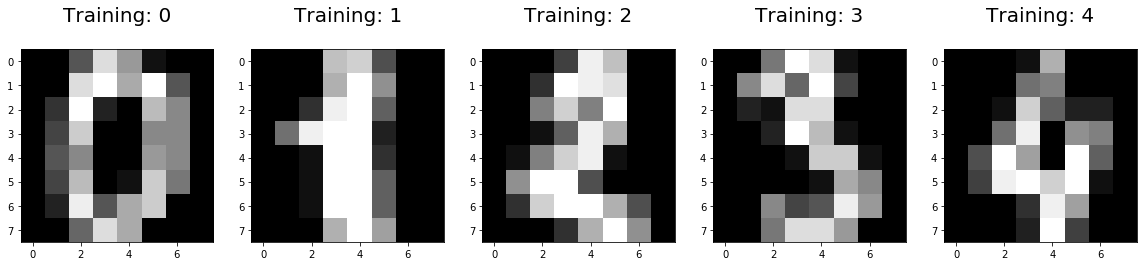

In [10]:

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='newton-cg')
logisticRegr.fit(x_train, y_train)

# Predict for One Observation (image)
#logisticRegr.predict(x_test[0].reshape(1,-1))
#logisticRegr.predict(x_test[0:10])

predictions = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)



0.9533333333333334


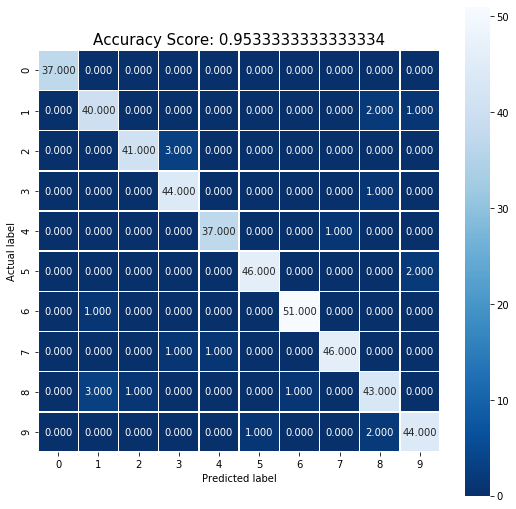

In [43]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
# confusion matrix

import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(model.classes_)   #the attribute .classes_ represents the array of distinct values that y takes:
print(model.intercept_)
print(model.coef_)
print(model.predict(x))
print(model.score(x, y))

print(classification_report(y, model.predict(x)))

[0 1]
[-1.04608067]
[[0.51491375]]
[0 0 0 1 1 1 1 1 1 1]
0.9
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



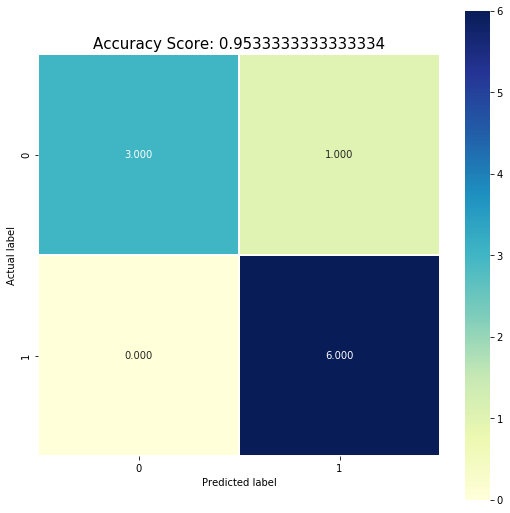

In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(y, model.predict(x))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [37]:
x_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

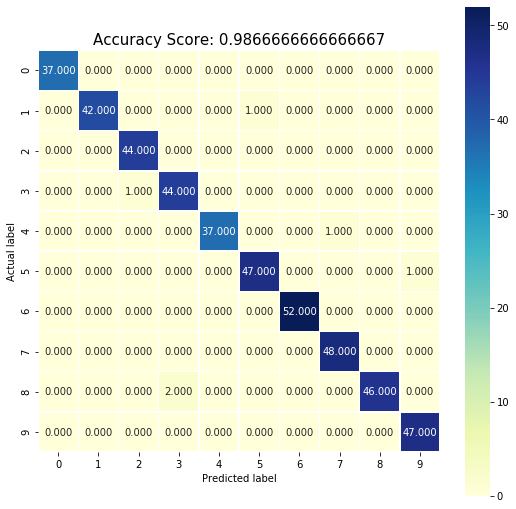

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
from sklearn import metrics

digits = load_digits()
# Train the model using the training sets

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

model.fit(x_train,y_train)
#Predict Output

cm = metrics.confusion_matrix(y_test, model.predict(x_test))

score = model.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);




In [18]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing

# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

#creating label Encoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print ("Weather:",weather_encoded)

# Encode temp and play columns. Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print ("Temp:",temp_encoded)
print ("Play:",label)

#combining features weather and temp in a single variable (list of tuples).

features=np.column_stack((weather_encoded,temp_encoded))
print ("Combined feature:",features)


# Generate a model using naive bayes classifier in the following steps:
# 1. Create naive bayes classifier
# 2. Fit the dataset on classifier
# 3. Perform prediction

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)




Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Combined feature: [[2 1]
 [2 1]
 [0 1]
 [1 2]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 0]
 [1 2]
 [2 2]
 [0 2]
 [0 1]
 [1 2]]
Predicted Value: [1]


In [50]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ('Predicted Value:', predicted)

Predicted Value: [1]


In [52]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


In [19]:
# code for decision tree based classification 
from sklearn import datasets
#Loading the iris data
# Loading dataset
iris_data = datasets.load_iris()
print('Classes to predict: ', iris_data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [21]:
#Extracting data attributes
X = iris_data.data
### Extracting target/ class labels
y = iris_data.target

print('Number of examples in the data:', X.shape[0])


#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
clf.fit(X_train, y_train)


Number of examples in the data: 150


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9736842105263158


In [26]:
#importing the libraries
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
iris_data = pd.read_csv(r'C:/Users/GNG/Desktop/datasets/iris_dataset.csv')
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


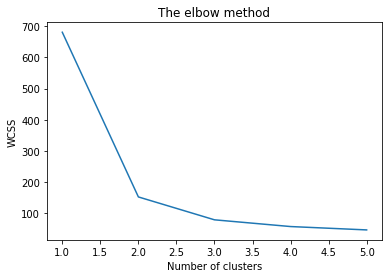

In [27]:

#Implementation of  The elbow method on the Iris dataset to pick optimum number 
# of clusters for classification. 
from sklearn.cluster import KMeans
# WCSS = Within Cluster Sum of Squares 
WCSS = []

# Getting features from the dataset
x = iris_data.iloc[:, [1, 2, 3, 4]].values

for i in range(1, 6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 6), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [28]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

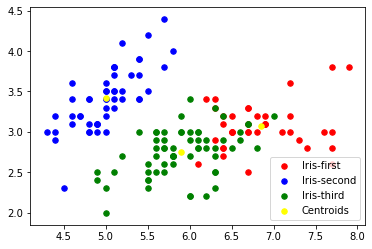

In [29]:
#Visualising the clusters 0 and 1, SepalLengthCm vs SepalWidthCm
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-first')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-second')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-third')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()


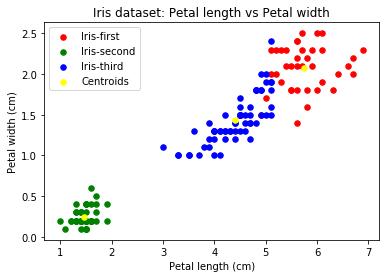

In [30]:
#Visualising the clusters 2 and 3, PetalLengthCm vs PetalWidthCm
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 30, c = 'red', label = 'Iris-first')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 30, c = 'green', label = 'Iris-second')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 30, c = 'blue', label = 'Iris-third')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 30, c = 'yellow', label = 'Centroids')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris dataset: Petal length vs Petal width')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris dataset: Petal length vs Petal width')
plt.legend()
plt.show()



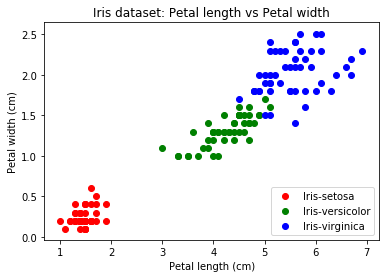

In [63]:

setosa_selection = iris_data.Species == 'Iris-setosa'
versicolor_selection = iris_data.Species == 'Iris-versicolor'
virginica_selection = iris_data.Species == 'Iris-virginica'

setosa_examples= iris_data[setosa_selection]
versicolor_examples= iris_data[versicolor_selection]
virginica_examples= iris_data[virginica_selection]

plt.scatter(setosa_examples['PetalLengthCm'],setosa_examples['PetalWidthCm'],c='red', label='Iris-setosa')
plt.scatter(versicolor_examples['PetalLengthCm'],versicolor_examples['PetalWidthCm'],c='green', label='Iris-versicolor')
plt.scatter(virginica_examples['PetalLengthCm'],virginica_examples['PetalWidthCm'],c='blue', label='Iris-virginica')


plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris dataset: Petal length vs Petal width')
plt.legend(loc='lower right')

plt.show()




In [36]:
# To dowonload, follow the links
# https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv
# https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_test.csv

# Give the complete path of your train.csv file
train = pd.read_csv("C:/Users/GNG/Desktop/datasets/mnist_train.csv")     
df = pd.DataFrame(train)
df['label'] = train['label']

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(df.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

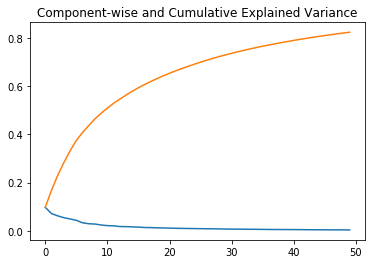

In [37]:
plt.plot(range(50), pca.explained_variance_ratio_)
plt.plot(range(50), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. We are able to explain around 80% variance in the dataset using just 50 components.

In [38]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
mydata = array([1, 2, 3, 4, 5, 6])
# prepare cross validation
kfold = KFold(3, True)
# enumerate splits
for train, test in kfold.split(mydata):
    print('train: %s, test: %s' % (mydata[train], mydata[test]))


train: [2 3 4 5], test: [1 6]
train: [1 4 5 6], test: [2 3]
train: [1 2 3 6], test: [4 5]


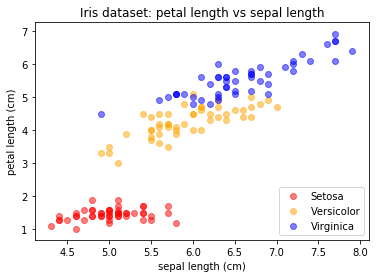

In [39]:
import pandas as pd

# Load some data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

colours = ['red', 'orange', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')

plt.show()

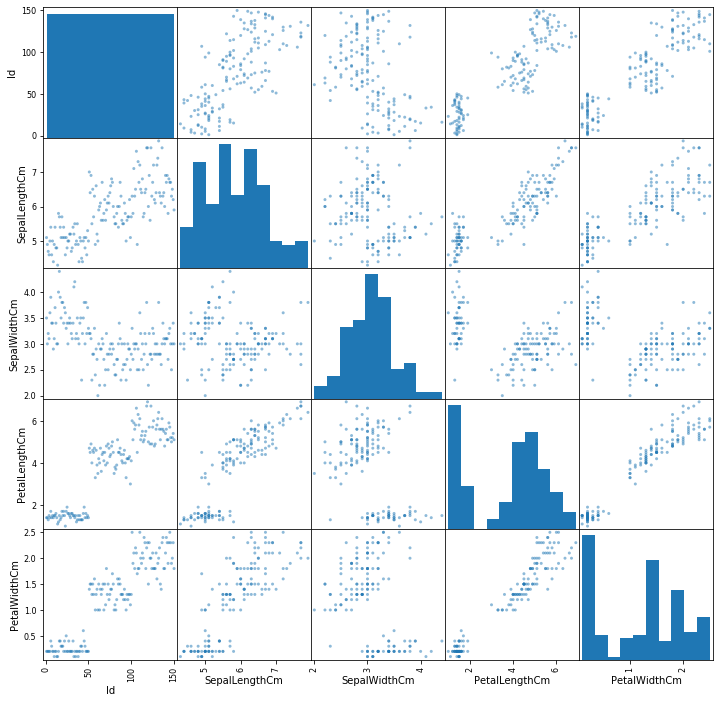

In [156]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data, figsize=(12, 12), diagonal='hist')
plt.show()


In [41]:
x = np.arange(10).reshape(-1, 1)
x.shape

(10, 1)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Linear regression 
x = np.random.rand(100, 1)   # generate random data of 100 samples
y = - 3 * x + 5 + np.random.rand(100, 1)   # randomly generated samples are offset and multiplied

# Linear Regression Model initialization
regress_model = LinearRegression()
# Fit the data(train the model)
regress_model.fit(x, y)
# Predict
y_predicted = regress_model.predict(x)

# model evaluation
mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))


print('The MSE is: %f,:' % mse)
print('The RMSE is: %f,:' % rmse)


The MSE is: 0.077856,:
The RMSE is: 0.279028,:
